In [1]:
import pandas as pd
import numpy as np
import sqlite3

In [2]:
conn = sqlite3.connect('../res/tables.sql')
cursor = conn.cursor()

In [3]:
# # ['id', 'gender', 'age', 'significant other', 'household size', 'family relationship', 'free time', 'social activities', 'study time','failures', 'absences', 'health', 'weekday drinker', 'weekend drinker', 'drinker']

cursor.execute('''
SELECT p.id, gender, age, "significant other", "household size", "family relationship", 
"free time", "social activities", "study time", failures, absences, health,
"weekday drinker", "weekend drinker", drinker
FROM profile as p
JOIN activities as a
ON p.id = a.id
''')

row = cursor.fetchall()
description = cursor.description
conn.close()

In [4]:
df = pd.DataFrame(data=row, columns=map(lambda x: x[0], description))
df = df.set_index('id')
df.head()

,gender,age,significant other,household size,family relationship,free time,social activities,study time,failures,absences,health,weekday drinker,weekend drinker,drinker
id,,,,,,,,,,,,,,
1,1,18,0,1,4,3,4,2,0,6,3,1,1,0
2,1,17,0,1,5,3,3,2,0,4,3,1,1,0
3,1,15,0,0,4,3,2,2,3,10,3,2,3,1
4,1,15,1,1,3,2,2,3,0,2,5,1,1,0
5,1,16,0,1,4,3,2,2,0,4,5,1,2,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
# features = ['gender', 'age', 'household size', 'family relationship', 'health', 'study time', 'social activities', 'absences']
# removing "free time" increased the accuracy by 3%
features = ['gender', 'age', 'significant other', 'household size', 'family relationship', 'social activities', 'study time','failures', 'absences', 'health']
output = 'drinker'

X = df[features]
y = df[output]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [19]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
X_train_scaled

array([[ 0.88291871,  0.19950597, -0.73575715, ..., -0.40839262,
        -0.08921365, -0.43809522],
       [ 0.88291871,  0.19950597,  1.35914412, ..., -0.40839262,
         0.56669517, -0.43809522],
       [ 0.88291871,  0.19950597, -0.73575715, ..., -0.40839262,
        -0.41716806, -1.88547311],
       ...,
       [ 0.88291871, -0.58944945,  1.35914412, ...,  1.07891631,
         3.35430767, -0.43809522],
       [-1.1326071 , -1.37840488, -0.73575715, ..., -0.40839262,
        -0.74512248,  1.00928266],
       [-1.1326071 ,  0.19950597,  1.35914412, ..., -0.40839262,
        -0.41716806, -1.88547311]])

In [21]:
predictions = model.predict(X_test_scaled)
predictions

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [22]:
acc_score = accuracy_score(y_test, predictions)
acc_score

0.7662835249042146

In [23]:
conf_mat = confusion_matrix(y_test, predictions)
conf_mat

array([[115,  36],
       [ 25,  85]], dtype=int64)

In [24]:
pd.DataFrame(data=conf_mat, index=['Actual 1', 'Actual 0'], columns=['Predicted 1', 'Predicted 0'])

,Predicted 1,Predicted 0
Actual 1,115,36
Actual 0,25,85


In [25]:
pd.DataFrame(data=conf_mat, index=['Positive', 'Negative'], columns=['True', 'False'])

,True,False
Positive,115,36
Negative,25,85


In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       151
           1       0.70      0.77      0.74       110

    accuracy                           0.77       261
   macro avg       0.76      0.77      0.76       261
weighted avg       0.77      0.77      0.77       261



In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

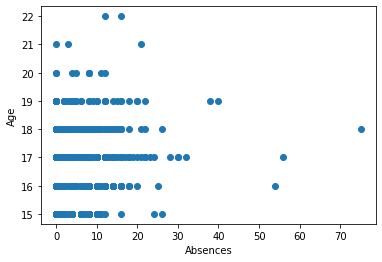

In [28]:
plt.scatter( df['absences'], df['age'])
plt.ylabel('Age')
plt.xlabel('Absences')
plt.show()

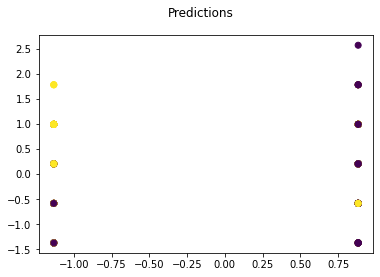

In [29]:
plt.scatter( X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test)
plt.suptitle('Predictions')
plt.show()


### Predictions
 - The purple dots represent drinkers predictions
 - The yellow dots represent non-drinkers predictions
 
#### The drinker section is on the right hand side and the non-drinker section is on the left hand side
 - The **lone yellow dot** (false drinker prediction) on the right hand side is a **false positive**
 - The **2 purple dots** (false non-drinker prediction) on the left hand side are **false negatives**